In [23]:
%matplotlib notebook
from forschungspraktikum.jiles_atherton.functions import get_gradient, jiles_atherton_H, get_cost
from scipy.optimize import minimize
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0

In [24]:
# Beispielparameter des Jiles-Atherton-Modells
alpha = 0.001
a = 110.5
k = 30.0
c = 0.4
Msat = 1.35e5

params = [alpha, a, Msat, k, c]

# Eingangsgrößen
r = 2.0e-2 # m, Radius
i_hat = 25.0 # A, Strom
f = 1000.0 # Hz, Frequenz
n = 3 # Anzahl Perioden
n_p = 512# Datenpunkte pro Periode


In [25]:
t = np.arange(n * n_p)/(n_p*f) # Zeitvektor
current = i_hat*np.cos(2*np.pi*f*t) # Stromvorgabe
H = current/(2*np.pi*r) # Resultierende Feldvorgabe

In [26]:
p_test = [alpha, a-40, Msat-1.0e5, k, c+0.2]

M_test = np.array(jiles_atherton_H(H, t, p_test)) + 200*np.random.normal(0.0, 100.0, int(t.size/2))

In [27]:
def function_to_optimize(x):
    return get_cost(H, t, M_test, x)

def grad(x):
    return np.array(get_gradient(H, t, M_test, x))

def callback(x):
    pass#print(x)

res = minimize(function_to_optimize, params, 
               method="TNC", options={'maxiter': 1000, 'disp': True}, 
               callback=callback,
               jac=grad,
               bounds = [(0, None), (0, None), (0, None), (0, None), (0, None)],
               tol=1.0e-8
              )


In [28]:
print(res)

     fun: 104901798.30643615
     jac: array([ 1.20082606e+02, -8.51748696e-04,  6.88433174e-05, -1.03057359e-02,
        1.01953967e+05])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 96
     nit: 24
  status: 1
 success: True
       x: array([2.34053128e-03, 1.03250766e+02, 3.93707374e+04, 1.88200294e+01,
       0.00000000e+00])


In [29]:
M = jiles_atherton_H(H, t, p_test)
M_ = jiles_atherton_H(H, t, res.x)
M_i = jiles_atherton_H(H, t, params)

<IPython.core.display.Javascript object>


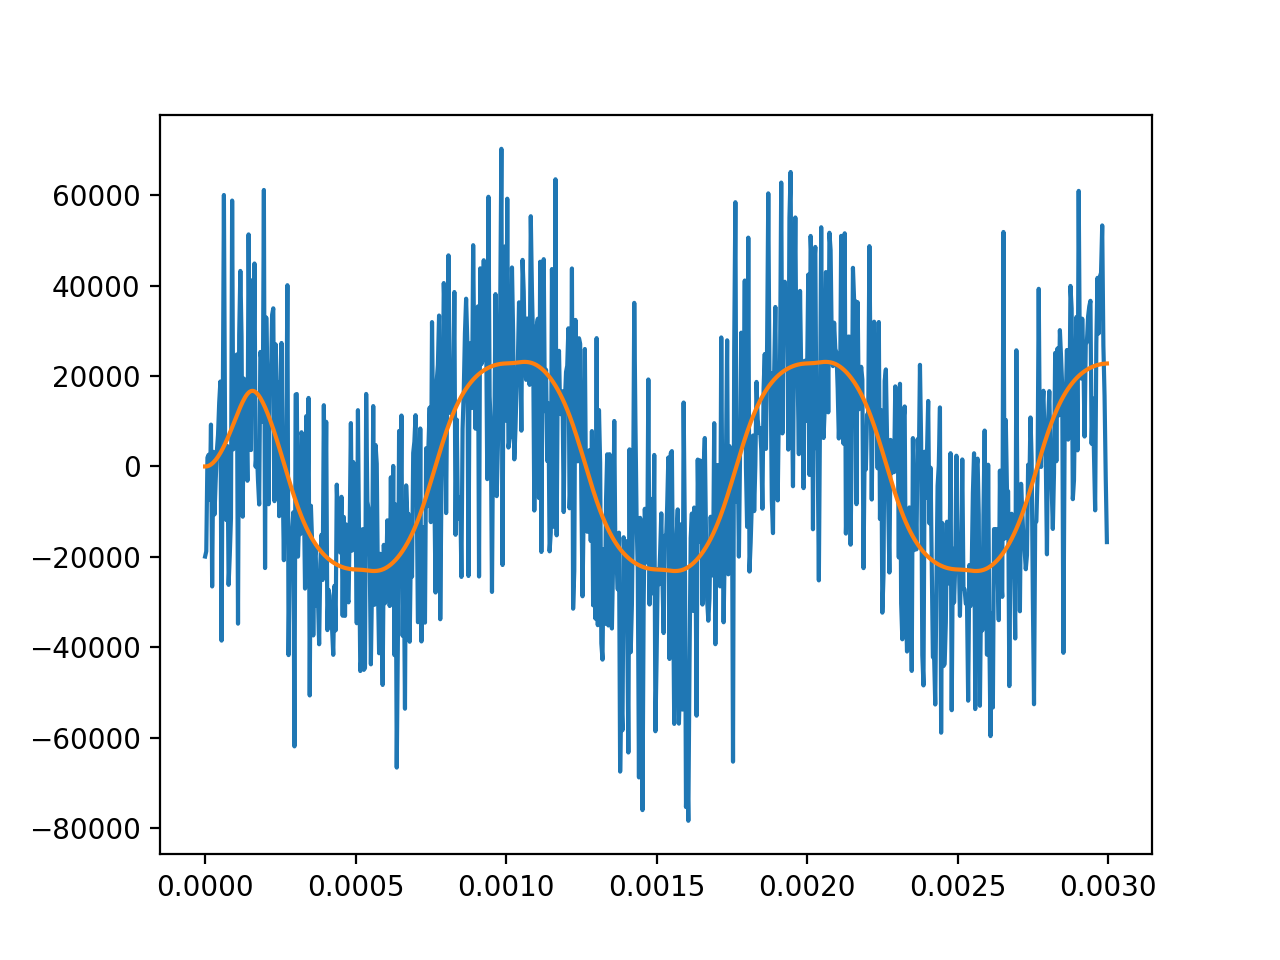

In [30]:
plt.plot(t[::2], M_test)
plt.plot(t[::2], M_)
#plt.plot(t[::2], M_i)
plt.show()

In [22]:
res_ = np.array(res.x)
p_test_ = np.array(p_test)
print(res_, p_test)
print(np.abs((1 - res_/p_test_)))

[1.02163596e-03 1.10371529e+02 1.31246517e+05 2.95613122e+01
 3.82695718e-01] [0.001, 70.5, 35000.0, 30.0, 0.6000000000000001]
[0.02163596 0.56555361 2.74990047 0.01462293 0.3621738 ]
